In [3]:
import networkx as nx # standard naming convention (p. 17)

In [4]:
G = nx.Graph() # this makes an empty undirected graph
G2 = nx.DiGraph() # this makes an empty directed graph
F = nx.Graph(G) # this makes G into an undirected (empty) graph
G3 = nx.multigraph # this makes an empty multigraph
G4 = nx.MultiDiGraph() # this makes an empty multiple digraph

In [5]:
# Now let's import some stuff...
import matplotlib.pyplot as plt
%cd ~/desktop/Python/data/CNAP_data
import dzcnapy_plotlib as dzcnapy
import csv

/Users/gjmb/Desktop/Python/data/CNAP_data


In [6]:
# and get our toy data-set loaded
with open("nutrients.csv") as infile:
    csv_reader = csv.reader(infile)
    G = nx.Graph(csv_reader)
print(G.nodes())

['A', 'carrots', 'eggs', 'fatty fish', 'green leafy vegs', 'liver', 'milk', 'tomatoes', 'B12', 'B6', 'asparagus', 'beans', 'kidneys', 'potatoes', 'C', 'pumpkins', 'Ca', 'broccoli', 'cheese', 'Cu', 'nuts', 'whole grains', 'D', 'mushrooms', 'E', 'seeds', 'Mn', 'legumes', 'wheat', 'Se', 'Zn', 'beef', 'riboflavin', 'niacin', 'folates', 'spinach', 'poultry', 'shellfish', 'thiamin', 'veg oils', 'yogurt']


In [7]:
# we can remove self-loops mistakenly included with the following
# Nb that this is clearly, if implicitly, a contextual mistake; sometimes such loops would be intentionally included 
# as they map real features of the data. First, let's look at the loops (note errata in book not listed at the errata
# page here [https://pragprog.com/cms/errata/dzcnapy-errata/]; I just show the correct code here, with mistakes noted
# in pen in the book. 
loops = list(nx.selfloop_edges(G))
print(loops) # so, tomatoes have a mistaken self-loop

[('tomatoes', 'tomatoes')]


In [8]:
# Now we remove the edges from the list of loops
G.remove_edges_from(loops)
loops = list(nx.selfloop_edges(G)) # re-assign loops (if we don't re-assign, we'll just have the old list)
    # ... even when that list is now out-of-date (this is like the mistake in Stata of, say, tagging duplicates,
    # dropping duplicates, but then, instead of re-running -duplicates report-, just listing the tagged obs.--or,
    # say, generating newvar = f(oldvar), then recoding oldvar's MVs *after* the fact, a problem which is common
    # among my students in 365. 
print(loops)

[]


In [9]:
# We can also relabel and capitalize nodes like so. 
mapping = {node: node.title() for node in G if isinstance(node, str)}
    # node.title() is a function that capitalizes; isinstance seems to be a function that accepts a variable type
    # and value type (maybe nodes can be of heterogeneous types). 
nx.relabel_nodes(G, mapping, copy=False) # "copy = False" ditches the original graph
print(G.nodes())

['A', 'B12', 'B6', 'C', 'Ca', 'Cu', 'D', 'E', 'Mn', 'Se', 'Zn', 'Yogurt', 'Veg Oils', 'Thiamin', 'Shellfish', 'Poultry', 'Spinach', 'Folates', 'Niacin', 'Riboflavin', 'Beef', 'Wheat', 'Legumes', 'Seeds', 'Mushrooms', 'Whole Grains', 'Nuts', 'Cheese', 'Broccoli', 'Pumpkins', 'Potatoes', 'Kidneys', 'Beans', 'Asparagus', 'Tomatoes', 'Milk', 'Liver', 'Green Leafy Vegs', 'Fatty Fish', 'Eggs', 'Carrots']


In [10]:
# We can also use some dict() features of G...
print(G["Zn"]) # This prints the adjacent node AFAICT (seems to be typo in book)
print(G["Riboflavin"]) # another example

{'Poultry': {}, 'Beef': {}, 'Nuts': {}, 'Potatoes': {}, 'Kidneys': {}, 'Beans': {}, 'Liver': {}}
{'Beef': {}, 'Legumes': {}, 'Milk': {}, 'Green Leafy Vegs': {}, 'Eggs': {}}


In [11]:
nutrients = set(("B12", "Zn", "D", "B6", "A", "Se", "Cu", "Folates",
                "Ca", "Mn", "Thiamin", "Riboflavin", "C", "E", "Niacin"))
nutrient_dict = {node: (node in nutrients) for node in G}
nx.set_node_attributes(G, nutrient_dict, "nutrient") # this syntax changed in Networkx 2.0


In [12]:
import matplotlib.pyplot as plt

In [13]:
colors = ["yellow" if n[1]["nutrient"] else "pink" for n in
G.nodes(data=True)]
dzcnapy.medium_attrs["node_color"] = colors

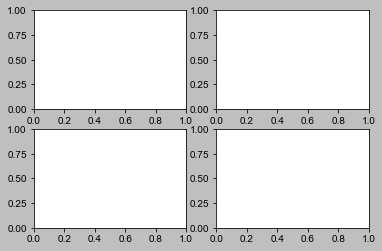

In [14]:
_, plot = plt.subplots(2,2)

In [15]:
%matplotlib notebook 
    # https://archive.ph/5ISSP

<IPython.core.display.Javascript object>


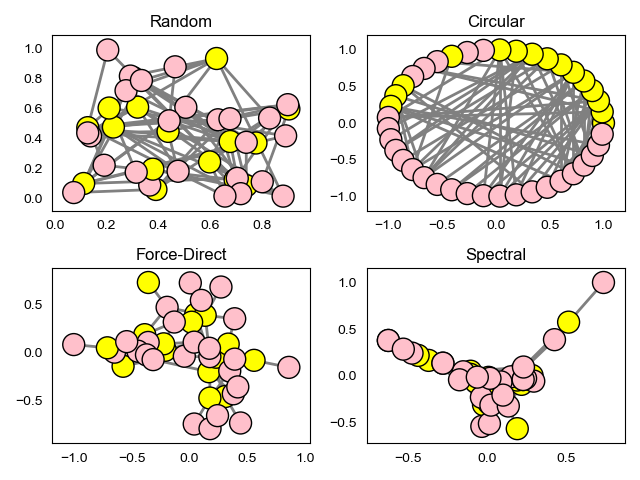

In [17]:
_, plot = plt.subplots(2,2)
subplots = plot.reshape(1, 4)[0]
layouts = (nx.random_layout, nx.circular_layout, nx.spring_layout, nx.spectral_layout)
titles = ("Random", "Circular", "Force-Direct", "Spectral")
for plot, layout, title in zip(subplots, layouts, titles):
    pos = layout(G)
    nx.draw_networkx(G, pos=pos, ax=plot, with_labels=False,
                    **dzcnapy.medium_attrs)
    plot.set_title(title)
    dzcnapy.set_extent(pos, plot)
    dzcnapy.plot("nutrients")